In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
from sklearn.datasets import load_iris
data=pd.read_csv(r'C:\Users\premk\Downloads\archive.zip')

print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  
0      211         251       837         0      1  
1     

In [3]:
list1= data.columns[2:-1]
list1

Index(['post_created', 'post_text', 'user_id', 'followers', 'friends',
       'favourites', 'statuses', 'retweets'],
      dtype='object')

In [5]:
print(data.isnull().sum())

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64


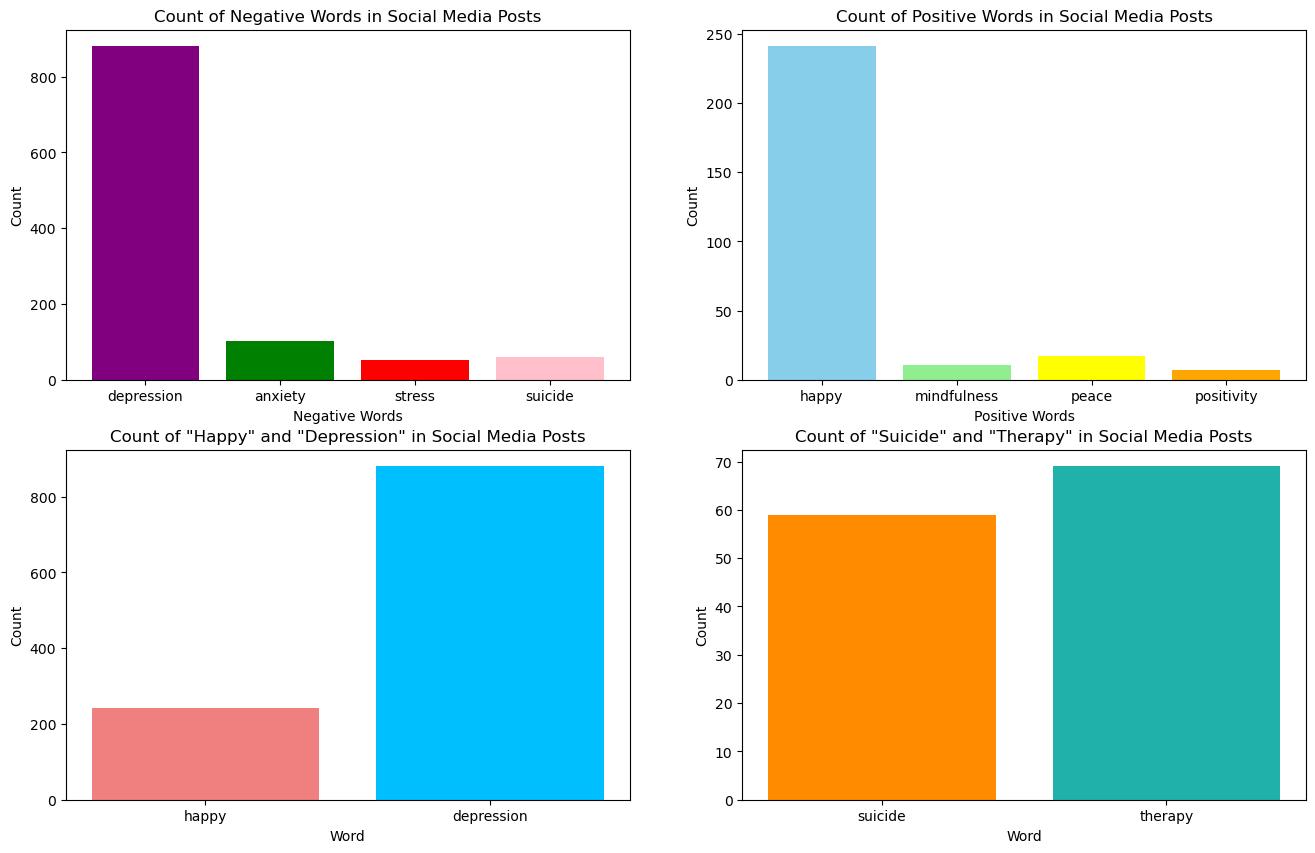

In [23]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove @mentions and hashtags
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove leading and trailing spaces
    return text


df = pd.read_csv(r'C:\Users\premk\Downloads\archive.zip') 

# Apply text cleaning
df['clean_text'] = df['post_text'].apply(clean_text)

# Define words
negative_words = ['depression', 'anxiety', 'stress', 'suicide']
positive_words = ['happy', 'mindfulness', 'peace', 'positivity']
pair_1_words = ['happy', 'depression']
pair_2_words = ['suicide', 'therapy']

# Initialize counters
word_counts_negative = Counter()
word_counts_positive = Counter()
word_counts_pair_1 = Counter()
word_counts_pair_2 = Counter()

# Count negative words
for text in df['clean_text']:
    word_counts_negative.update(word for word in text.split() if word in negative_words)

# Count positive words
for text in df['clean_text']:
    word_counts_positive.update(word for word in text.split() if word in positive_words)

# Count specific pairs
for text in df['clean_text']:
    word_counts_pair_1.update(word for word in text.split() if word in pair_1_words)
    word_counts_pair_2.update(word for word in text.split() if word in pair_2_words)

# Extract counts and colors
counts_negative = [word_counts_negative[word] for word in negative_words]
counts_positive = [word_counts_positive[word] for word in positive_words]
counts_pair_1 = [word_counts_pair_1[word] for word in pair_1_words]
counts_pair_2 = [word_counts_pair_2[word] for word in pair_2_words]

colors_negative = ['purple', 'green', 'red', 'pink']
colors_positive = ['skyblue', 'lightgreen', 'yellow', 'orange']
colors_pair_1 = ['lightcoral', 'deepskyblue']
colors_pair_2 = ['darkorange', 'lightseagreen']

# Plotting
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.bar(negative_words, counts_negative, color=colors_negative)
plt.xlabel('Negative Words')
plt.ylabel('Count')
plt.title('Count of Negative Words in Social Media Posts')

plt.subplot(2, 2, 2)
plt.bar(positive_words, counts_positive, color=colors_positive)
plt.xlabel('Positive Words')
plt.ylabel('Count')
plt.title('Count of Positive Words in Social Media Posts')

plt.subplot(2, 2, 3)
plt.bar(pair_1_words, counts_pair_1, color=colors_pair_1)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Count of "Happy" and "Depression" in Social Media Posts')

plt.subplot(2, 2, 4)
plt.bar(pair_2_words, counts_pair_2, color=colors_pair_2)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Count of "Suicide" and "Therapy" in Social Media Posts')

plt.show()


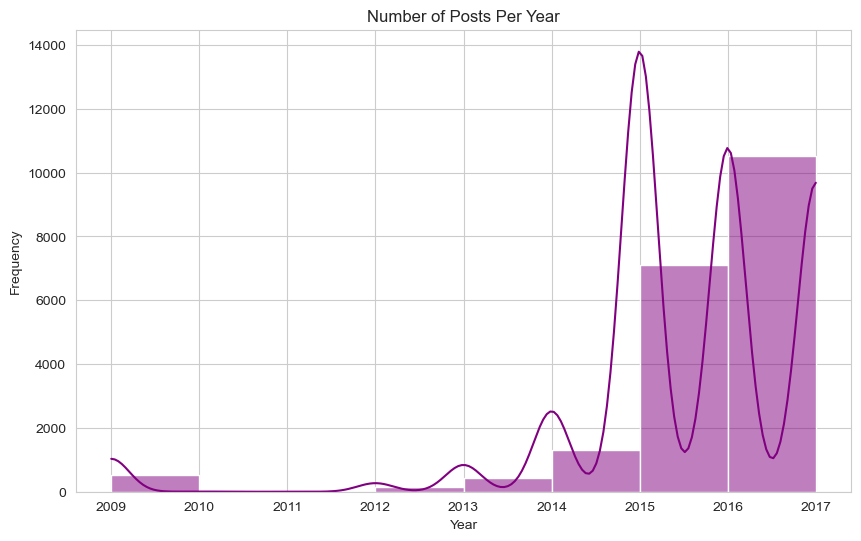

In [33]:
def extract_year(date_str):
    try:
       
        date_obj = datetime.strptime(date_str, '%a %b %d %H:%M:%S %z %Y')
        return date_obj.year
    except ValueError:
        return None 


df['year'] = df['post_created'].apply(extract_year)
df = df.dropna(subset=['year'])
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], kde=True, color='purple', bins=len(df['year'].unique()))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Posts Per Year')
plt.show()


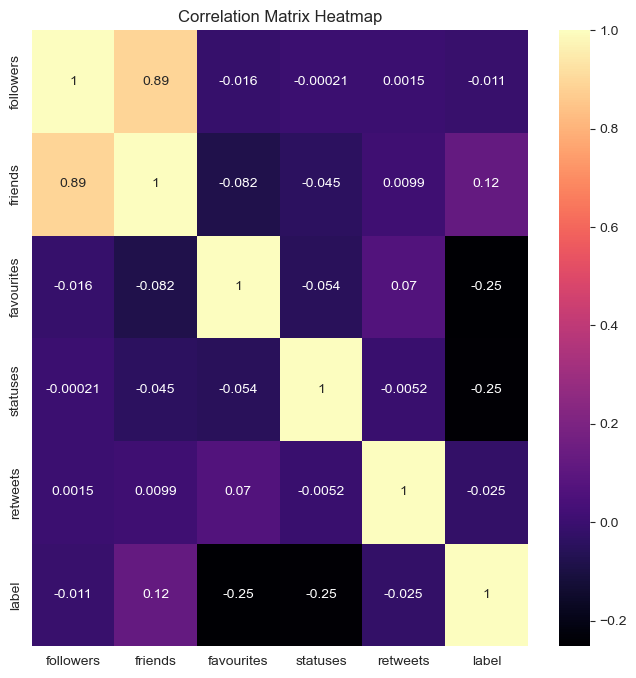

In [35]:
columns_to_drop = ['Unnamed: 0', 'post_id', 'user_id']
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')
numeric_data = data_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')

plt.title('Correlation Matrix Heatmap')

plt.show()

In [37]:
label_encoders={}
categorical_columns=['post_created','post_text']
for column in categorical_columns:
    label_encoders[column]=LabelEncoder()
    data[column]=label_encoders[column].fit_transform(data[column])
data   

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,7902,9921,1013187241,84,211,251,837,0,1
1,1,637890384576778240,7901,9895,1013187241,84,211,251,837,1,1
2,2,637749345908051968,5261,6444,1013187241,84,211,251,837,0,1
3,3,637696421077123073,5242,13585,1013187241,84,211,251,837,2,1
4,4,637696327485366272,5241,9969,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,12197,5965,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,12192,6647,1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,12191,16617,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,12189,15871,1169875706,442,230,7,1063601,0,0


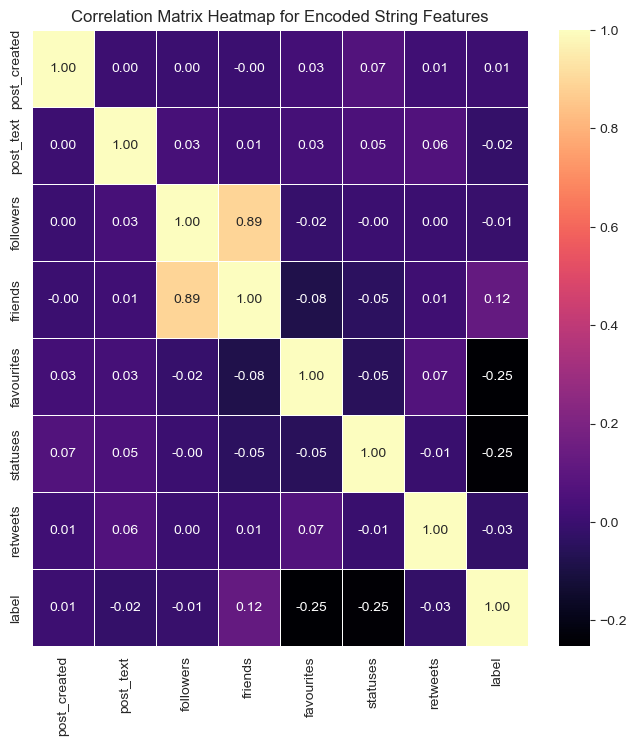

In [39]:
columns_to_drop = ['Unnamed: 0', 'post_id', 'user_id']
data_encoded = data.drop(columns=columns_to_drop, errors='ignore')
encoded_string_features = data_encoded.select_dtypes(include=[int, float])

correlation_matrix = encoded_string_features.corr()

# Create the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap for Encoded String Features')

plt.show()

In [41]:
#input
x=data.iloc[2:,:-1].values
#output
y=data.iloc[:,-1].values
x,y

(array([[                 2, 637749345908051968,               5261, ...,
                        251,                837,                  0],
        [                 3, 637696421077123073,               5242, ...,
                        251,                837,                  2],
        [                 4, 637696327485366272,               5241, ...,
                        251,                837,                  1],
        ...,
        [             19997, 819334503042871297,              12191, ...,
                          7,            1063601,                  0],
        [             19998, 819334419374899200,              12189, ...,
                          7,            1063601,                  0],
        [             19999, 819334270825197568,              12188, ...,
                          7,            1063601,                  0]],
       dtype=int64),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

Confusion Matrix for Logistic Regression: 
 [[13  3]
 [ 7 37]]
Logistic Regression Accuracy: 83.33%
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        16
           1       0.93      0.84      0.88        44

    accuracy                           0.83        60
   macro avg       0.79      0.83      0.80        60
weighted avg       0.85      0.83      0.84        60

--------------------------------------------------


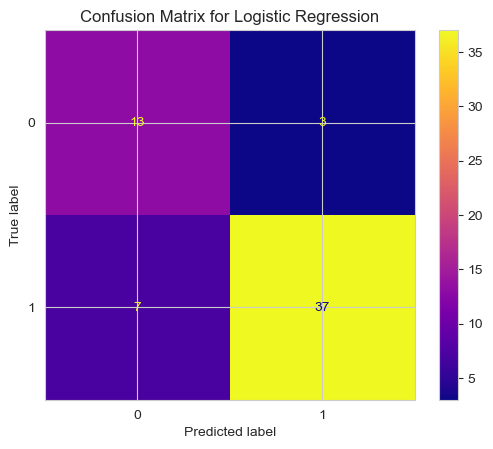

Confusion Matrix for Decision Tree: 
 [[13  3]
 [ 9 35]]
Decision Tree Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.59      0.81      0.68        16
           1       0.92      0.80      0.85        44

    accuracy                           0.80        60
   macro avg       0.76      0.80      0.77        60
weighted avg       0.83      0.80      0.81        60

--------------------------------------------------


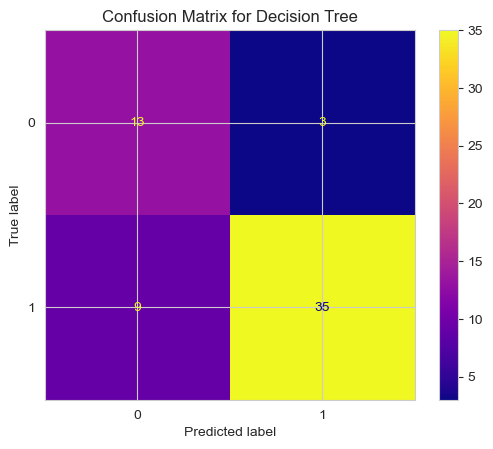

Confusion Matrix for Naive Bayes: 
 [[14  2]
 [ 5 39]]
Naive Bayes Accuracy: 88.33%
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.95      0.89      0.92        44

    accuracy                           0.88        60
   macro avg       0.84      0.88      0.86        60
weighted avg       0.89      0.88      0.89        60

--------------------------------------------------


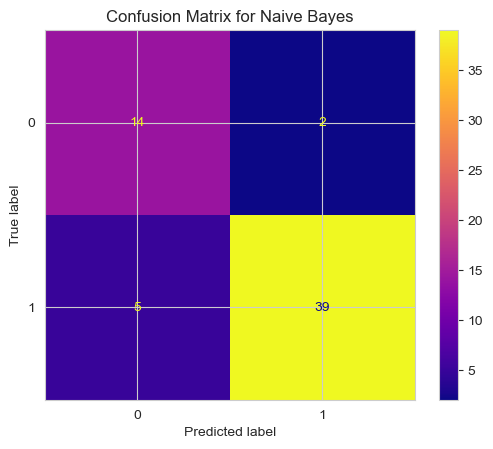

Confusion Matrix for Support Vector Machine: 
 [[11  5]
 [ 5 39]]
Support Vector Machine Accuracy: 83.33%
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.89      0.89      0.89        44

    accuracy                           0.83        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.83      0.83      0.83        60

--------------------------------------------------


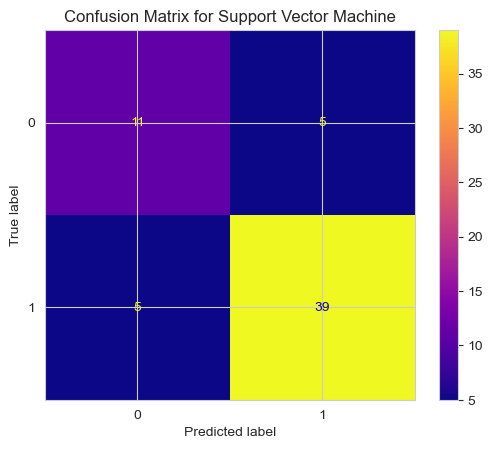

Confusion Matrix for K-Nearest Neighbors: 
 [[10  6]
 [ 3 41]]
K-Nearest Neighbors Accuracy: 85.00%
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        16
           1       0.87      0.93      0.90        44

    accuracy                           0.85        60
   macro avg       0.82      0.78      0.80        60
weighted avg       0.84      0.85      0.84        60

--------------------------------------------------


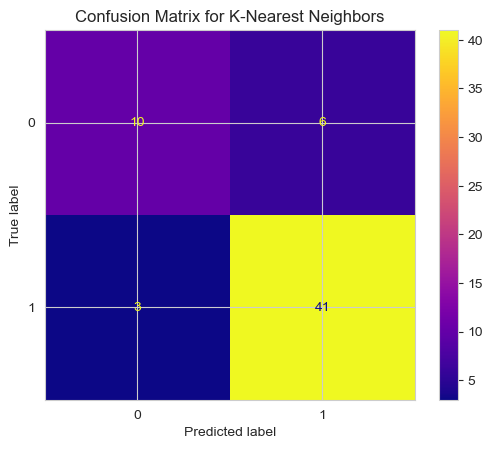

Summary of Accuracies:
Logistic Regression: 83.33%
Decision Tree: 80.00%
Naive Bayes: 88.33%
Support Vector Machine: 83.33%
K-Nearest Neighbors: 85.00%


In [43]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

data = load_iris()

# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
y_binary = y.apply(lambda x: 0 if x == 0 else 1)

# Add even more noise to the features to decrease accuracy
np.random.seed(0)  
noise = np.random.normal(0, 2.0, X.shape)  # Further increased noise level
X_noisy = X + noise

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_noisy)

# Split the data with a smaller training set to further increase difficulty
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_binary, test_size=0.4, random_state=0)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train, predict, and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Confusion Matrix for {name}: \n", cm)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred))
    print('-' * 50)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='plasma')  # Choose your preferred colormap
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

print("Summary of Accuracies:")
for name, accuracy in results.items():
    print(f'{name}: {accuracy * 100:.2f}%')


In [45]:
#finding the best classifier
best_classifier=max(results,key=results.get)
print(f'best classifier :{best_classifier} with accuracy:{results[best_classifier]:.4f}')


best classifier :Naive Bayes with accuracy:0.8833


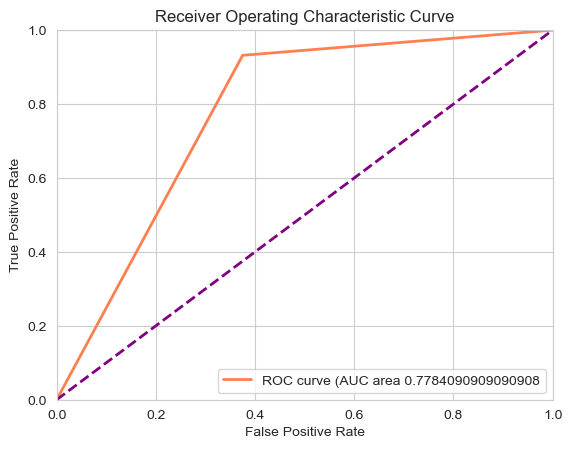

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Actual outcomes and predicted probabilities
# Calculate ROC curve
fpr, tpr, thresholds =roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc =auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="coral", lw=2, label=f'ROC curve (AUC area {roc_auc}')
plt.plot([0, 1], [0, 1], color="purple", lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
